In [7]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import pandas as pd
import numpy as np

from weavingspace import TileUnit
from weavingspace import Tiling

In [10]:
# anthromes_geom_gdf = gpd.read_file("anthromes/Anthromes-12k-DGG/an12_dgg_inputs/Anthromes-12k-DGG/an12_dgg_inputs.shp")
anthromes_geom_gdf = gpd.read_file("C:/data/Anthromes-12k-DGG/an12_dgg_inputs.shp")

#anthromes_attrib_df = pd.read_csv("anthromes/Anthromes-12k-DGG/an12_dgg_inputs/Anthromes-12k-DGG/an12_dgg_baseline.csv")
anthromes_attrib_df = pd.read_csv("C:/data/Anthromes-12k-DGG/an12_dgg_baseline.csv")

world_boundaries_gdf = gpd.read_file("NACIS-2022/wgs84-densified-world-extent.gpkg")

In [17]:
anthromes_geom_gdf

'geometry'

In [12]:
anthromes_attrib_df

,id,10000BC,9000BC,8000BC,7000BC,6000BC,5000BC,4000BC,3000BC,2000BC,...,2008AD,2009AD,2010AD,2011AD,2012AD,2013AD,2014AD,2015AD,2016AD,2017AD
0,1,61,61,61,61,61,61,61,61,53,...,12,12,12,12,12,12,12,12,12,12
1,60,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
2,61,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
3,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
4,481,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429019,5204374,63,63,63,63,63,63,63,63,63,...,62,62,62,62,62,54,54,54,54,54
1429020,5205104,63,63,63,63,63,63,63,63,63,...,43,43,43,43,43,42,42,42,42,42
1429021,5206561,63,63,63,63,63,63,63,63,63,...,43,43,43,43,43,43,43,43,43,43
1429022,5207290,63,63,63,63,63,63,63,63,63,...,43,43,43,43,43,43,43,43,43,43


In [14]:
anthromes_gdf = anthromes_geom_gdf.merge(anthromes_attrib_df,how='left',on='id')
anthromes_gdf

,id,land_ar,pot_veg,pot_vll,regn_nm,geometry,10000BC,9000BC,8000BC,7000BC,...,2008AD,2009AD,2010AD,2011AD,2012AD,2013AD,2014AD,2015AD,2016AD,2017AD
0,1,0.035996,4.0,1.0,Europe,"POLYGON ((11.15386 58.26606, 11.19049 58.32552...",61,61,61,61,...,12,12,12,12,12,12,12,12,12,12
1,60,0.070934,13.0,0.0,North America,"POLYGON ((-168.68220 63.18021, -168.61456 63.1...",62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
2,61,16.432507,13.0,0.0,North America,"POLYGON ((-168.68202 63.26480, -168.61421 63.2...",62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
3,62,43.679928,13.0,0.0,North America,"POLYGON ((-168.68185 63.34943, -168.61386 63.3...",62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
4,481,0.892202,15.0,1.0,Europe,"POLYGON ((11.08554 79.76483, 10.91970 79.80860...",63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429019,5204374,63.676296,15.0,0.0,Oceania,"POLYGON ((-176.35115 -44.00310, -176.35725 -44...",63,63,63,63,...,62,62,62,62,62,54,54,54,54,54
1429020,5205104,5.190774,15.0,0.0,Oceania,"POLYGON ((-176.21160 -43.99708, -176.21758 -44...",63,63,63,63,...,43,43,43,43,43,42,42,42,42,42
1429021,5206561,22.751982,15.0,0.0,Oceania,"POLYGON ((-176.16856 -44.22711, -176.17454 -44...",63,63,63,63,...,43,43,43,43,43,43,43,43,43,43
1429022,5207290,22.845491,15.0,0.0,Oceania,"POLYGON ((-176.10739 -44.30165, -176.11334 -44...",63,63,63,63,...,43,43,43,43,43,43,43,43,43,43


In [85]:
anthromes_dissolved_gdf = anthromes_gdf[['geometry','1800AD','1900AD','2017AD']].dissolve(by=['1800AD','1900AD','2017AD'],as_index=False)

In [87]:
anthromes_dissolved_gdf.geometry = anthromes_dissolved_gdf.buffer(0.000001, resolution=1, join_style=2)
anthromes_dissolved_gdf = anthromes_dissolved_gdf.dissolve(by=['1800AD','1900AD','2017AD'],as_index=False)
anthromes_dissolved_gdf.geometry = anthromes_dissolved_gdf.buffer(-0.000001,resolution=1, join_style=2)
anthromes_dissolved_gdf.to_crs(epsg=8857).is_valid.all()

C:\Users\Luke\AppData\Local\Temp\ipykernel_6636\515143912.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anthromes_dissolved_gdf.geometry = anthromes_dissolved_gdf.buffer(0.000001, resolution=1, join_style=2)
C:\Users\Luke\AppData\Local\Temp\ipykernel_6636\515143912.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anthromes_dissolved_gdf.geometry = anthromes_dissolved_gdf.buffer(-0.000001,resolution=1, join_style=2)


True

In [88]:
anthromes_dissolved_gdf.to_crs(epsg=8857).is_valid.all()

True

In [75]:
anthromes_dissolved_gdf

,1800AD,1900AD,2017AD,geometry
0,11,11,11,"MULTIPOLYGON (((-16.87680 32.65594, -16.81159 ..."
1,11,23,11,"POLYGON ((-6.05280 53.27866, -6.12579 53.25089..."
2,12,11,11,"MULTIPOLYGON (((-58.36960 -34.49753, -58.30789..."
3,12,12,11,"MULTIPOLYGON (((-15.58916 11.77228, -15.64679 ..."
4,12,12,12,"MULTIPOLYGON (((3.26724 6.34029, 3.26612 6.398..."
...,...,...,...,...
1369,63,63,42,"POLYGON ((42.82701 13.79883, 42.81132 13.74920..."
1370,63,63,43,"MULTIPOLYGON (((-73.05790 -53.32331, -73.05081..."
1371,63,63,54,"MULTIPOLYGON (((-60.55138 -51.97032, -60.46540..."
1372,63,63,62,"MULTIPOLYGON (((-73.76967 -48.78289, -73.77512..."


In [97]:
anthromes_land_regions_gdf = anthromes_dissolved_gdf.dissolve()

In [98]:
anthromes_land_regions_gdf.to_crs(epsg=8857).is_valid.all()

False

In [99]:
anthromes_land_regions_gdf.geometry = anthromes_land_regions_gdf.buffer(0.000001, resolution=1, join_style=2)
anthromes_land_regions_gdf = anthromes_land_regions_gdf.dissolve(by=['1800AD','1900AD','2017AD'],as_index=False)
anthromes_land_regions_gdf.geometry = anthromes_land_regions_gdf.buffer(-0.000001,resolution=1, join_style=2)
anthromes_land_regions_gdf.to_crs(epsg=8857).is_valid.all()

C:\Users\Luke\AppData\Local\Temp\ipykernel_6636\550913118.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anthromes_land_regions_gdf.geometry = anthromes_land_regions_gdf.buffer(0.000001, resolution=1, join_style=2)
C:\Users\Luke\AppData\Local\Temp\ipykernel_6636\550913118.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  anthromes_land_regions_gdf.geometry = anthromes_land_regions_gdf.buffer(-0.000001,resolution=1, join_style=2)


True

In [100]:
world_boundaries_gdf['1800AD'] = 0
world_boundaries_gdf['1900AD'] = 0
world_boundaries_gdf['2017AD'] = 0
world_boundaries_gdf


,geometry,1800AD,1900AD,2017AD
0,"MULTIPOLYGON (((-180.00000 -90.00000, -180.000...",0,0,0


,geometry,1800AD,1900AD,2017AD
0,"MULTIPOLYGON (((-180.00000 -89.75001, -180.000...",0,0,0


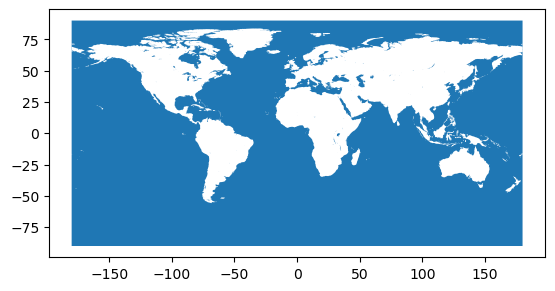

In [101]:
oceans_without_anthromes_gdf = gpd.overlay(world_boundaries_gdf,anthromes_land_regions_gdf,how='difference')
oceans_without_anthromes_gdf.plot()
oceans_without_anthromes_gdf

In [102]:
oceans_without_anthromes_gdf.to_crs(epsg=8857).is_valid.all()

True

C:\Users\Luke\AppData\Local\Temp\ipykernel_6636\1487963507.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dissolved_anthromes_with_oceans_gdf = anthromes_dissolved_gdf.append(oceans_without_anthromes_gdf).to_crs(epsg=8857)


<AxesSubplot:>

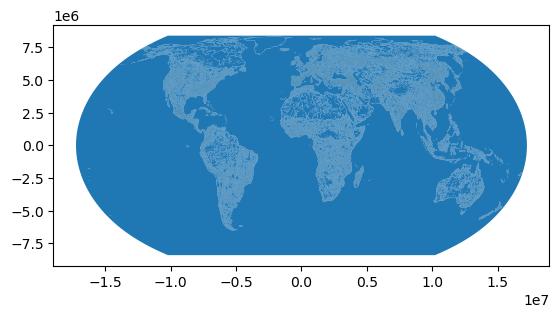

In [103]:
dissolved_anthromes_with_oceans_gdf = anthromes_dissolved_gdf.append(oceans_without_anthromes_gdf).to_crs(epsg=8857)
dissolved_anthromes_with_oceans_gdf.plot()

In [104]:
dissolved_anthromes_with_oceans_gdf.to_file("NACIS-2022/anthromes.gpkg", layer='anthromes', driver="GPKG")
dissolved_anthromes_with_oceans_gdf = gpd.read_file("NACIS-2022/anthromes.gpkg", layer='anthromes', driver="GPKG")
dissolved_anthromes_with_oceans_gdf.index.name = 'dissolved_id'
dissolved_anthromes_with_oceans_gdf.to_file("NACIS-2022/anthromes.gpkg", layer='anthromes', driver="GPKG")
dissolved_anthromes_with_oceans_gdf = gpd.read_file("NACIS-2022/anthromes.gpkg", layer='anthromes', driver="GPKG")
dissolved_anthromes_with_oceans_gdf.set_index('dissolved_id')
dissolved_anthromes_with_oceans_gdf

c:\Users\Luke\Miniconda3\envs\geopandas_10_2\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


,dissolved_id,1800AD,1900AD,2017AD,geometry
0,0,11,11,11,"MULTIPOLYGON (((10956991.270 4637292.644, 1095..."
1,1,11,23,11,"POLYGON ((-465746.168 6309381.175, -471477.536..."
2,2,12,11,11,"MULTIPOLYGON (((11864618.365 4311334.857, 1186..."
3,3,12,12,11,"MULTIPOLYGON (((11756787.375 5269523.964, 1176..."
4,4,12,12,12,"MULTIPOLYGON (((14603364.466 -394422.814, 1460..."
...,...,...,...,...,...
1370,1370,63,63,43,"MULTIPOLYGON (((12936070.376 -1482822.556, 129..."
1371,1371,63,63,54,"MULTIPOLYGON (((11314195.005 7682244.987, 1130..."
1372,1372,63,63,62,"MULTIPOLYGON (((7591010.270 4501518.274, 75938..."
1373,1373,63,63,63,"MULTIPOLYGON (((12129159.917 7443285.135, 1212..."


In [105]:
dissolved_anthromes_with_oceans_gdf.geometry.is_valid.all()

True

In [106]:
unit = TileUnit(tiling_type = "hex-colouring", 
                #  Note these alternatives:
                #  tiling_type = "hex-dissection", 
                #  tiling_type = "hex-dissection", dissection_offset = 0,
                n = 3, crs = dissolved_anthromes_with_oceans_gdf.crs, 
                spacing = 500000).transform_rotate(15)
tiling = Tiling(unit, dissolved_anthromes_with_oceans_gdf, id_var = "dissolved_id", tile_margin = 0)


In [4]:
# tiling.region.buffer(tiling.tile_unit.spacing).unary_union

In [108]:
map = tiling.get_tiled_map(ragged_edges=True)
map.to_file('NACIS-2022/anthromes-tiled.gpkg')

TypeError: Tiling.get_tiled_map() got an unexpected keyword argument 'ragged_edges'

In [109]:
this will cause an error

SyntaxError: invalid syntax (2309815648.py, line 1)

/home/osullid3/anaconda3/envs/weaving/lib/python3.10/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/osullid3/anaconda3/envs/weaving/lib/python3.10/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 1
  Warn("Warning: setting k to %d" % k_q, UserWarning)


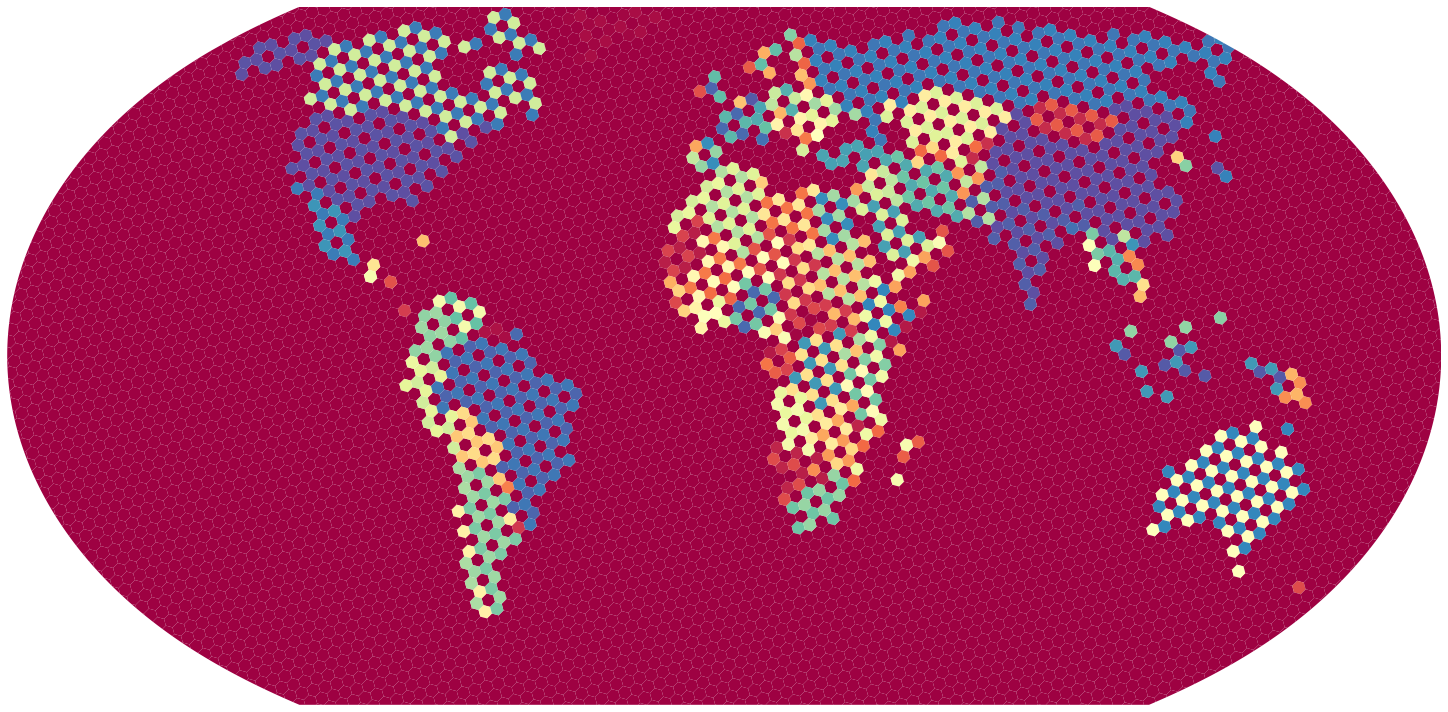

In [6]:
map.variables = dict(zip(list("abc"),
                        ("1800AD", "1900AD", "2017AD")))
map.colourmaps = dict(zip(map.variables.values(), 
                         ("Spectral", "Spectral", "Spectral")))

fig = map.render(legend = False, scheme = "quantiles") # quantiles for interest

/home/osullid3/anaconda3/envs/weaving/lib/python3.10/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/osullid3/anaconda3/envs/weaving/lib/python3.10/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 1
  Warn("Warning: setting k to %d" % k_q, UserWarning)


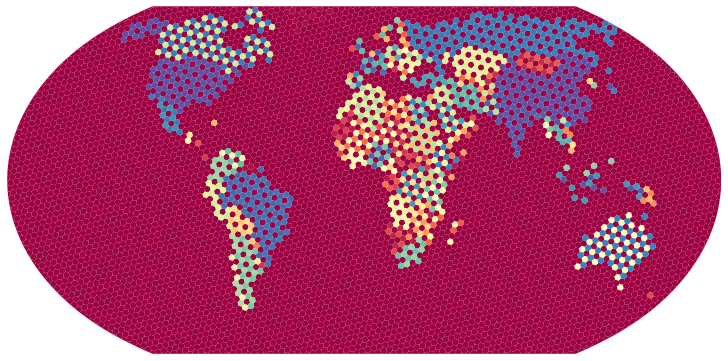

In [7]:
map.dpi = 600  # don't ask me what makes sense for DPI
map.figsize = (10, 7)

fig = map.render(legend = False, scheme = "quantiles")

In [8]:
fig.savefig("NACIS-2022/output/another-map.svg")